# Data Analysis and Prediction using Linear Regression Module

## 1. Import Library

In [1]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Add Dataset and Segregate Dataset for each Variant

In [2]:
# Read CSV for all dataset
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_CUM_POSITIVE',
       'ID_CUM_HOSPITALIZED', 'ID_CUM_CURED', 'ID_CUM_DEATH',
       'JKT_CUM_POSITIVE', 'JKT_CUM_HOSPITALIZED', 'JKT_CUM_CURED',
       'JKT_CUM_DEATH', 'JKT_CUM_SELFISOLATION', 'JKT_CUM_ACTIVEPOSITIVE',
       'ID_DAILY_POSITIVE', 'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED',
       'ID_DAILY_DEATH', 'JKT_DAILY_DEATH', 'JKT_DAILY_CURED',
       'JKT_DAILY_ISOLATION', 'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_ACTIVEPOSITIVE', 'JKT_DAILY_BURIAL', 'JKT_CUM_BURIAL',
       'JKT_DAILY_TESTSPECIMENT', 'JKT_DAILY_POSTEST', 'PoF_Positive',
       'JKT_DAILY_NEGTEST', 'JKT_DAILY_POSTRATE', 'PoF_PostRate',
       'JKT_CONS_VALUE', 'CoF_HSE', 'PoF_Spec_X_PostRate', 'Risk',
       'Risk_Criteria'],
      dtype='object')

In [3]:
# Select important dataset only for analysis and prediction

covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk']]

covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]

## 3. Linear Regression Analysis

### 3.1 Single Variable Prediction between Daily Positive and Positivity Rate

In [4]:
# Import Library for Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Declaration test train split for supervise learning
# from pairplot above, we can see that correlation between postivity rate may have linear correlation with positive number.
X_train, X_test, y_train, y_test = train_test_split(covid_Delta.JKT_DAILY_POSTRATE, covid_Delta.JKT_DAILY_POSITIVE)

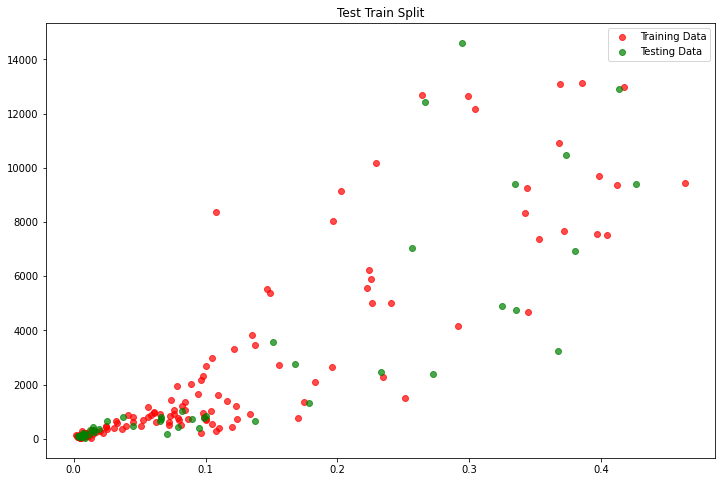

In [5]:
# Test train split visualization
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, label='Training Data', color='r',alpha=0.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g',alpha=0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [10]:
# Model fitting using Linear Regression Module
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

# PolynomialFeature Manipulation
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_xtrain = poly.fit_transform(X_train.values.reshape(-1,1))

# Fit model for polynomial features
PR = LinearRegression()
PR.fit(poly_xtrain, y_train.values)


LinearRegression()

In [11]:
# Use model to predict on test data
predict_LR = LR.predict(X_test.values.reshape(-1,1))



In [23]:
xtest_delta = covid_Delta.loc[:, ['Day', 'JKT_DAILY_POSTRATE', 'JKT_DAILY_POSITIVE', 'Risk']].sort_values(by=['JKT_DAILY_POSTRATE'])
xtest_delta.head()

,Day,JKT_DAILY_POSTRATE,JKT_DAILY_POSITIVE,Risk
602,175,0.001917,131,1.0
629,202,0.002493,114,2.0
615,188,0.003049,69,1.0
587,160,0.003344,100,1.0
620,193,0.003445,107,2.0


In [ ]:
# Predict in Polynomial
poly_xtest = poly.fit_transform(X_test.values.reshape(-1,1))

predict_PR = PR.predict(poly_xtest)


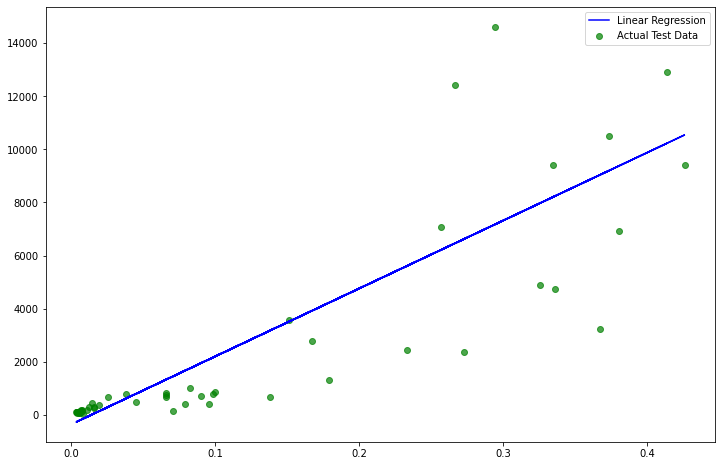

In [12]:
# Plot prediction line against actual test data
plt.figure(figsize=(12,8))
plt.plot(X_test, predict_LR, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [22]:
X_test_append = pd.DataFrame

AttributeError: 'Series' object has no attribute 'sort_value'

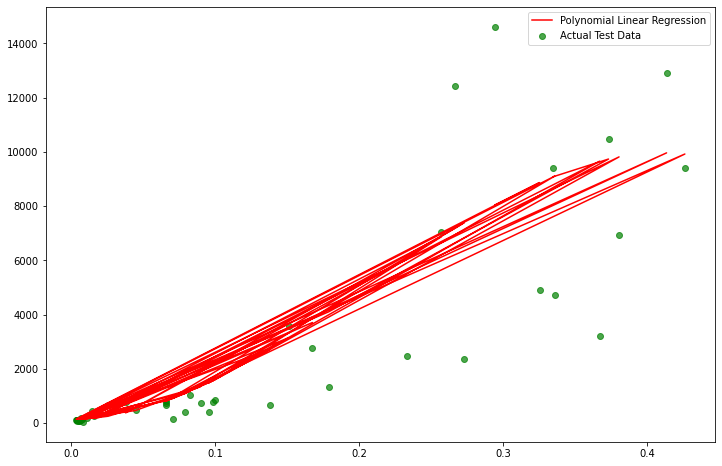

In [13]:
plt.figure(figsize=(12,8))
plt.plot(X_test, predict_PR, label='Polynomial Linear Regression', color='r')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
#find parameter for Linear Regression

lrcoef = LR.coef_

lrint = LR.intercept_

print("LR Coefficient: ",lrcoef)
print("LR Intercept: ", lrint)

In [ ]:
#daily_positive_predict = LR.intercept_ + LR.coef_*(daily_postrate)

daily_postrate = 0.4

daily_positive_predict = lrint + lrcoef*daily_postrate

daily_positive_predict

In [ ]:
# direct predict estimated daily_positive_predict using predict

LR.predict(np.array([[0.4]]))[0]

In [ ]:
# Model scoring

print('Mean squared error (MSE): %.2f'
    % mean_squared_error(y_test, prediction))
print('Coefficient of determination (R^2): %.2f'
    % r2_score(y_test, prediction))

### 4.2 Polynomial Features Single Variable between Daily Positive and Positivity Rate

reference: https://data36.com/polynomial-regression-python-scikit-learn/

In [ ]:
#Start Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
ds_delta = covid_Delta.loc[:, ['Day', 'JKT_DAILY_POSTRATE', 'JKT_DAILY_POSITIVE', 'Risk']].sort_values(by=['JKT_DAILY_POSTRATE'])
ds_delta.head()

In [ ]:
Xpostrate = ds_delta.JKT_DAILY_POSTRATE
ypost = ds_delta.JKT_DAILY_POSITIVE

In [ ]:
# Creating new features

poly_features = poly.fit_transform(Xpostrate.values.reshape(-1,1))

In [ ]:
# Creating the polynomial regression model

PR = LinearRegression()


In [ ]:
# Fit model
PRFIT = PR.fit(poly_features, ypost)

In [ ]:
y_predicted = PR.predict(poly_features)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Xpostrate, y_predicted, label='Polynomial Linear Regression', color='b')
plt.scatter(Xpostrate, ypost, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
print('Mean squared error (MSE): %.2f'
    % mean_squared_error(ypost, y_predicted))
print('Coefficient of determination (R^2): %.2f'
    % r2_score(ypost, y_predicted))

The polynomial regression has _higher Rsquare value_ hence it is expected more accurate.

In [ ]:
PRcoef = PR.coef_

PRint = PR.intercept_

print("PR Coefficient: ",PRcoef)
print("PR Intercept: ", PRint)

In [ ]:
#daily_positive_predict = PR.intercept_ + PR.coef_(1)*(daily_postrate) + PR.coef_(2)*(daily_postrate)^2

daily_postrate = 0.4

daily_positive_predict = PRint + 19386.03038933*daily_postrate + 15207.14891575*daily_postrate**2

daily_positive_predict

In [ ]:
# Prediction using Predict

PR.predict(poly.fit_transform([[0.4]]))

### 4.3 Prediction using Multiple Variable in Linear Regression

Selected variable are 